# Utilities

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn 
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage import util
from skimage.filters import gaussian
from sklearn import preprocessing



import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [126]:
def showImage(image):
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

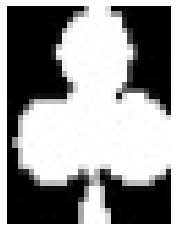

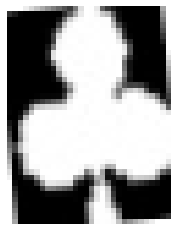

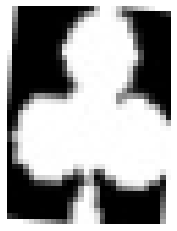

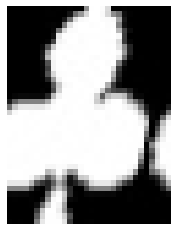

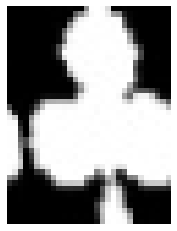

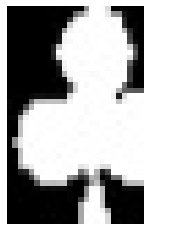

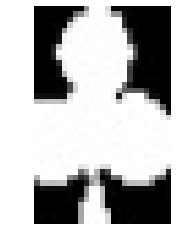

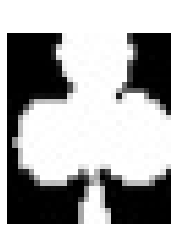

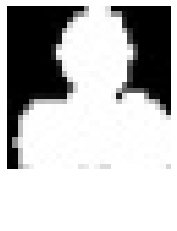

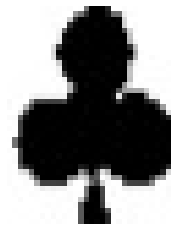

In [127]:

image = cv2.imread("DataSet/trainData/club/2C0.jpg", cv2.COLOR_BGR2GRAY)
showImage(image)

img = image

image = rotate(img, angle=5); 
showImage(image)
image = rotate(img, angle=-5); 
showImage(image)
image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap');
showImage(image)
image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); 
showImage(image)
#----------------------------------------------------------------
image = img.copy();
image[:, 25:] = 0
showImage(image)

image = img.copy();
image[:, 0:5] = 0
showImage(image)

image = img.copy();
image[0:5,:] = 0
showImage(image)

image = img.copy();
image[30:, :] = 0
showImage(image)

image = 255-img.copy();

showImage(image)


In [128]:
# Image Augmentation, referncee: https://www.codespeedy.com/image-augmentation-using-skimage-in-python/

def augmentImage(img):
    augmentedImages=[img.flatten()]
    augmentedImages.append(img.flatten()) # add the image multiple times
    augmentedImages.append(img.flatten()) # add the image multiple times
    # rotation
    image = rotate(img, angle=5); augmentedImages.append(image.flatten())
    image = rotate(img, angle=-5); augmentedImages.append(image.flatten())
    # Shearing
    image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    # Cropping by 7
    image = img.copy(); image[:, 23:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[:, 0:7] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[0:7,:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[33:, :] = 0; augmentedImages.append(image.flatten())
    # Cropping by 10
    image = img.copy(); image[:, 20:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[:, 0:10] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[0:10,:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[30:, :] = 0; augmentedImages.append(image.flatten())
    # inverse
    image = 1 - img.copy(); augmentedImages.append(image.flatten())

    
    return augmentedImages
    
    


# Import and split the data

In [129]:
import os
trainData = []
trainLabels = []

dire="DataSet/trainData" 

print(os.listdir(dire))

numClassesWithLimit = 0
LIMIT = 1150 # to have the same number of items in all classes
for innerDir in os.listdir(dire):
    count = 0
    for filename in os.listdir(dire+'/' +innerDir):
        # read image
        image = cv2.imread(dire+'/' + innerDir +'/' +filename, cv2.COLOR_BGR2GRAY)/255.0

        # augmentImage
        augmentedImages = augmentImage(image.copy())
        count +=  len(augmentedImages)

        # append images
        trainData+=augmentedImages
        trainLabels+=[innerDir] * len(augmentedImages)

        # to break the inner loop if the number of items in the class exceeded the LIMIT
        if (count >= LIMIT):
            numClassesWithLimit+=1
            print("Class", innerDir , "has", count, "items")
            break

print("Number of classes that have exceeded", LIMIT, "items is:", numClassesWithLimit, "out of", len(os.listdir(dire)))
print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))



['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
Class 10 has 1152 items
Class 2 has 1152 items
Class 3 has 1152 items
Class 4 has 1152 items
Class 5 has 1152 items
Class 6 has 1152 items
Class 7 has 1152 items
Class 8 has 1152 items
Class 9 has 1152 items
Class A has 1152 items
Class club has 1152 items
Class diamond has 1152 items
Class heart has 1152 items
Class J has 1152 items
Class K has 1152 items
Class Q has 1152 items
Class spade has 1152 items
Number of classes that have exceeded 1150 items is: 17 out of 17
trainData Size: 19584 and trainLabels size: 19584


In [130]:
from sklearn.model_selection import train_test_split

# split the data
trainData, testData, trainLabels, testLabels = train_test_split(trainData, trainLabels, test_size = 0.1 , random_state=50)


# Trainning

In [131]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) 
model_KNN.fit(trainData, trainLabels)



KNeighborsClassifier(n_jobs=-1, n_neighbors=17, weights='distance')

In [132]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_SVC = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=1e5))
# model_SVC = svm.SVC(gamma=.001,C=100)
model_SVC.fit(trainData, trainLabels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=100000.0, random_state=0, tol=1e-05))])

# Save the model

In [138]:
from joblib import dump, load
# save the model
dump(model_SVC, 'SVC_model.joblib') 
dump(model_KNN, 'KNN_model.joblib') 

# load the model
# model = load('model.joblib')

# model = model_KNN

['KNN_model.joblib']

# Evaluate the model

In [139]:
from sklearn.metrics import accuracy_score

# KNN
Labels_KNN_pred = model_KNN.predict(testData) 
print("KNN Model Accuarcy", accuracy_score(testLabels, Labels_KNN_pred)) # validate the model

KNN Model Accuarcy 0.9775395610005104


In [140]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(testData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(testLabels, Labels_SVM_pred)) # validate the model

SVM Model Accuarcy 0.9275140377743747


# Random TestCases

In [141]:
import random 

count  = 0
LIMIT = 100
for i in range(LIMIT):
    randomIndex = random.randint(0,len(testLabels))
    print("Predicted", testLabels[randomIndex], "as", model_SVC.predict([testData[randomIndex]])[0])
    if (testLabels[randomIndex] == model_SVC.predict([testData[randomIndex]])[0]):
        count += 1
print(count, "Passed out of", LIMIT)
# print("Predicted", testLabels[randomIndex], "as", model.predict([testData[randomIndex]]),
#     "With confidence", model.predict_proba([testData[randomIndex]]))


Predicted 3 as 3
Predicted club as club
Predicted spade as spade
Predicted 10 as 10
Predicted 9 as 9
Predicted club as club
Predicted 2 as 2
Predicted 5 as J
Predicted 9 as 8
Predicted 3 as A
Predicted Q as Q
Predicted A as A
Predicted J as J
Predicted 5 as 5
Predicted 2 as 2
Predicted 5 as 5
Predicted 10 as 10
Predicted 4 as 4
Predicted 10 as 10
Predicted club as club
Predicted A as K
Predicted diamond as diamond
Predicted 8 as 8
Predicted club as spade
Predicted Q as Q
Predicted 7 as 7
Predicted 9 as 9
Predicted 6 as 6
Predicted heart as heart
Predicted Q as A
Predicted Q as Q
Predicted 5 as 5
Predicted heart as heart
Predicted 5 as 5
Predicted heart as heart
Predicted 8 as 5
Predicted 6 as 6
Predicted 5 as 5
Predicted heart as heart
Predicted 5 as 5
Predicted 2 as 5
Predicted 8 as 8
Predicted 4 as 4
Predicted 4 as 4
Predicted A as A
Predicted 10 as 10
Predicted heart as heart
Predicted 4 as 4
Predicted 4 as 4
Predicted 10 as spade
Predicted 9 as 9
Predicted Q as Q
Predicted J as J
P

# Test Data

KNN: ['10'] SVM: ['10']


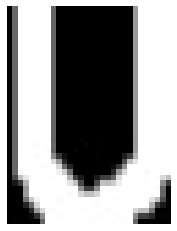

KNN: ['10'] SVM: ['10']


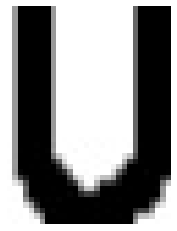

KNN: ['10'] SVM: ['10']


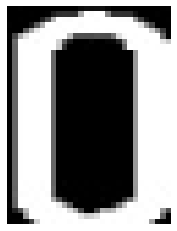

KNN: ['10'] SVM: ['10']


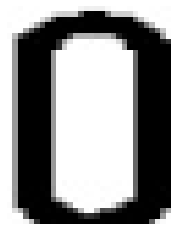

KNN: ['10'] SVM: ['heart']


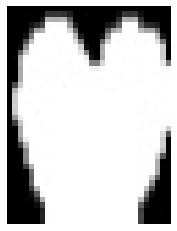

KNN: ['10'] SVM: ['heart']


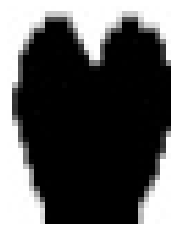

KNN: ['5'] SVM: ['4']


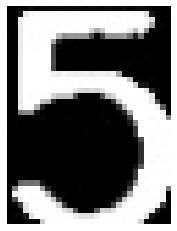

KNN: ['5'] SVM: ['4']


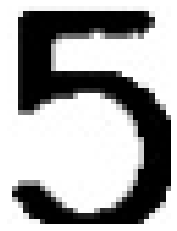

KNN: ['heart'] SVM: ['A']


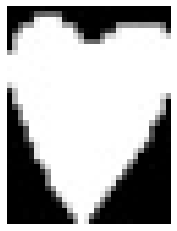

KNN: ['heart'] SVM: ['A']


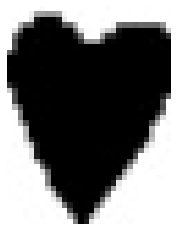

KNN: ['J'] SVM: ['J']


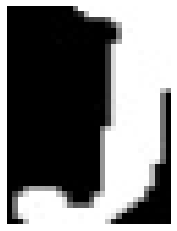

KNN: ['J'] SVM: ['J']


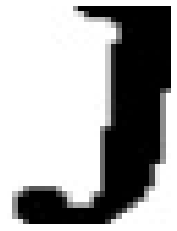

KNN: ['club'] SVM: ['club']


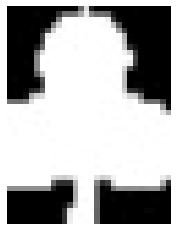

KNN: ['club'] SVM: ['club']


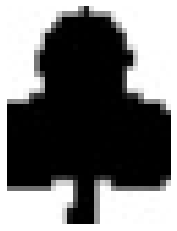

KNN: ['10'] SVM: ['K']


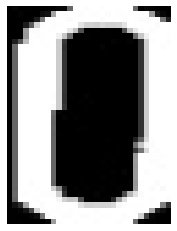

KNN: ['10'] SVM: ['K']


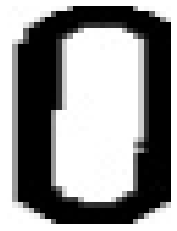

KNN: ['club'] SVM: ['club']


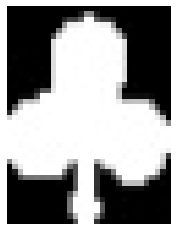

KNN: ['club'] SVM: ['club']


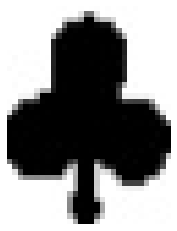

KNN: ['9'] SVM: ['9']


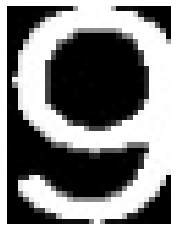

KNN: ['9'] SVM: ['9']


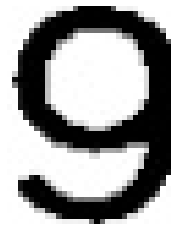

KNN: ['diamond'] SVM: ['Q']


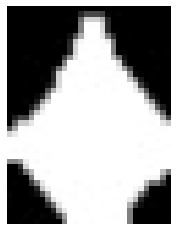

KNN: ['diamond'] SVM: ['Q']


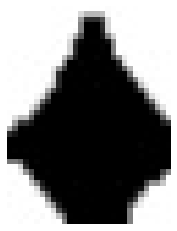

KNN: ['A'] SVM: ['A']


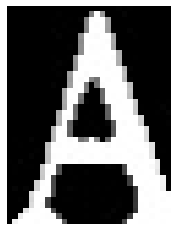

KNN: ['A'] SVM: ['A']


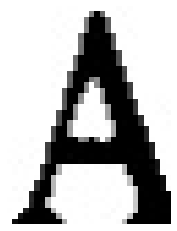

KNN: ['Q'] SVM: ['Q']


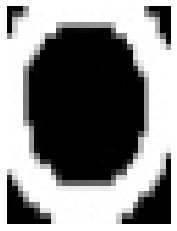

KNN: ['Q'] SVM: ['Q']


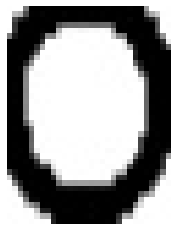

KNN: ['club'] SVM: ['club']


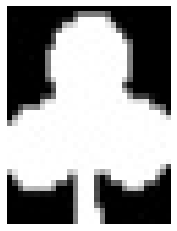

KNN: ['club'] SVM: ['club']


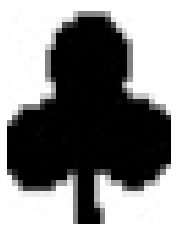

KNN: ['10'] SVM: ['10']


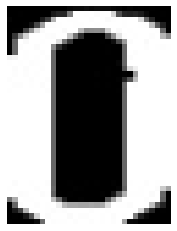

KNN: ['10'] SVM: ['10']


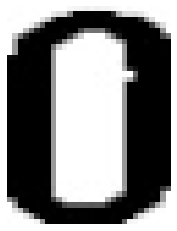

KNN: ['heart'] SVM: ['heart']


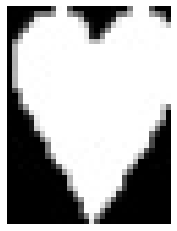

KNN: ['heart'] SVM: ['heart']


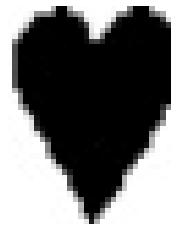

KNN: ['J'] SVM: ['J']


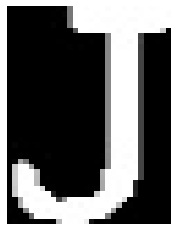

KNN: ['J'] SVM: ['J']


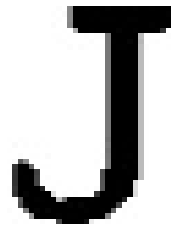

KNN: ['club'] SVM: ['club']


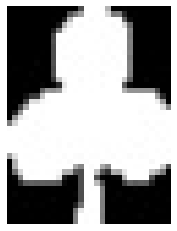

KNN: ['club'] SVM: ['club']


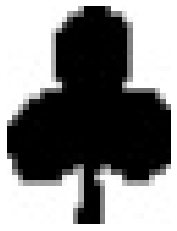

KNN: ['10'] SVM: ['Q']


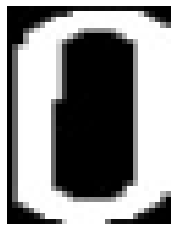

KNN: ['10'] SVM: ['Q']


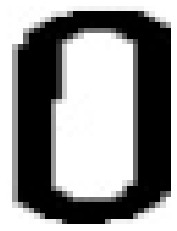

KNN: ['heart'] SVM: ['heart']


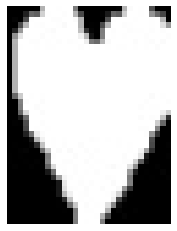

KNN: ['heart'] SVM: ['heart']


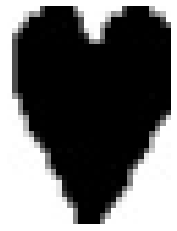

KNN: ['J'] SVM: ['3']


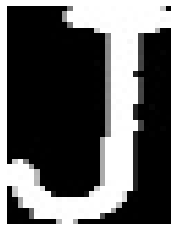

KNN: ['J'] SVM: ['3']


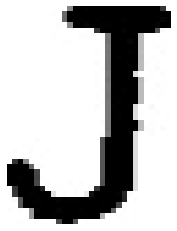

KNN: ['10'] SVM: ['spade']


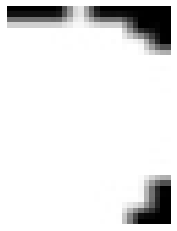

KNN: ['10'] SVM: ['spade']


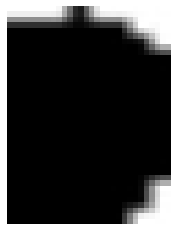

KNN: ['diamond'] SVM: ['diamond']


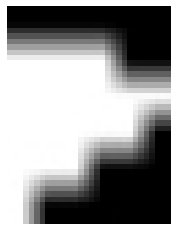

KNN: ['diamond'] SVM: ['diamond']


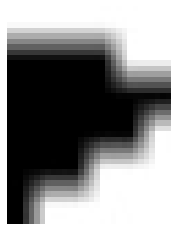

KNN: ['8'] SVM: ['8']


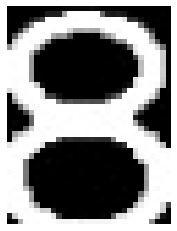

KNN: ['8'] SVM: ['8']


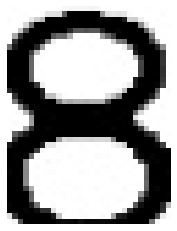

KNN: ['heart'] SVM: ['heart']


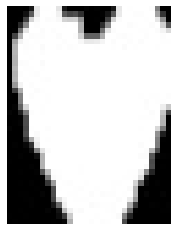

KNN: ['heart'] SVM: ['heart']


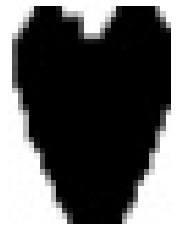

KNN: ['J'] SVM: ['7']


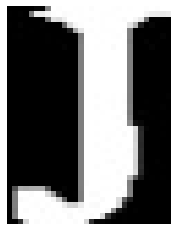

KNN: ['J'] SVM: ['7']


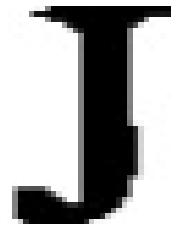

KNN: ['diamond'] SVM: ['diamond']


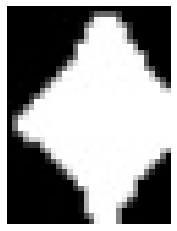

KNN: ['diamond'] SVM: ['diamond']


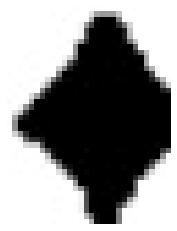

KNN: ['A'] SVM: ['9']


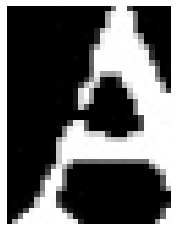

KNN: ['A'] SVM: ['9']


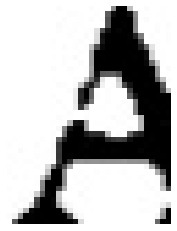

KNN: ['club'] SVM: ['6']


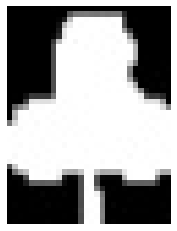

KNN: ['club'] SVM: ['6']


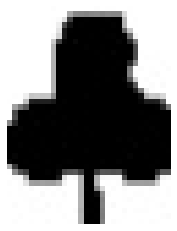

KNN: ['10'] SVM: ['Q']


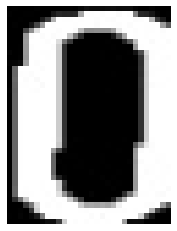

KNN: ['10'] SVM: ['Q']


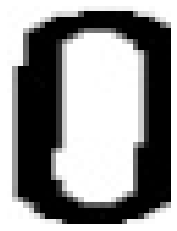

KNN: ['diamond'] SVM: ['diamond']


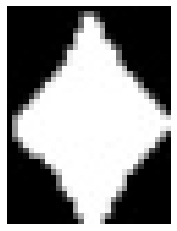

KNN: ['diamond'] SVM: ['diamond']


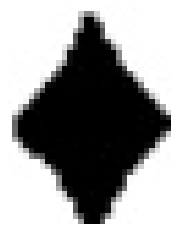

KNN: ['5'] SVM: ['5']


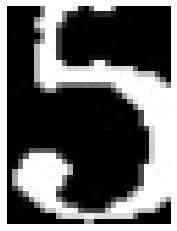

KNN: ['5'] SVM: ['5']


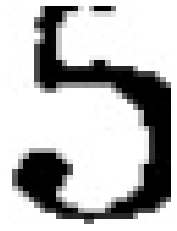

KNN: ['heart'] SVM: ['heart']


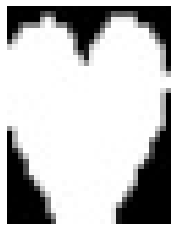

KNN: ['heart'] SVM: ['heart']


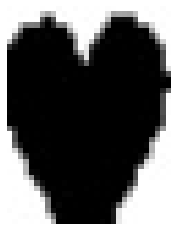

KNN: ['J'] SVM: ['J']


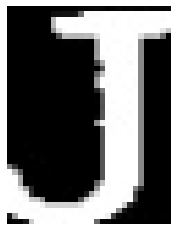

KNN: ['J'] SVM: ['J']


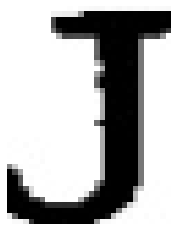

KNN: ['J'] SVM: ['3']


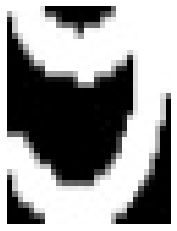

KNN: ['J'] SVM: ['3']


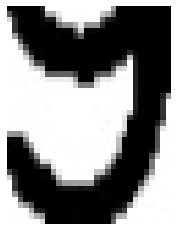

KNN: ['heart'] SVM: ['heart']


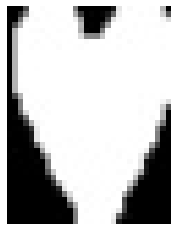

KNN: ['heart'] SVM: ['heart']


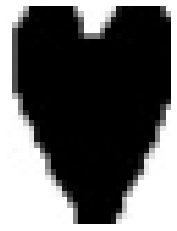

KNN: ['K'] SVM: ['3']


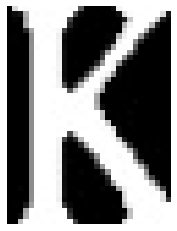

KNN: ['K'] SVM: ['3']


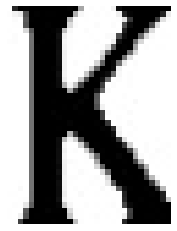

KNN: ['heart'] SVM: ['heart']


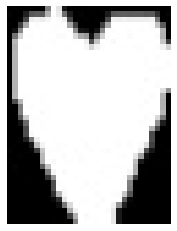

KNN: ['heart'] SVM: ['heart']


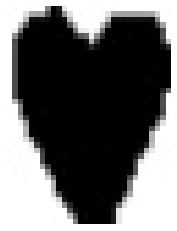

KNN: ['J'] SVM: ['J']


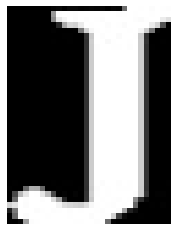

KNN: ['J'] SVM: ['J']


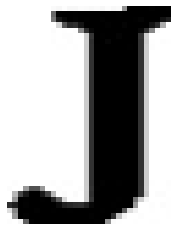

KNN: ['spade'] SVM: ['spade']


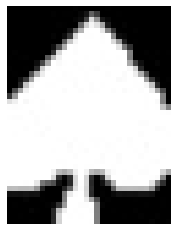

KNN: ['spade'] SVM: ['spade']


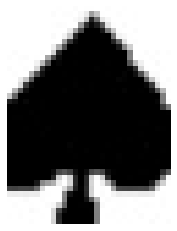

KNN: ['Q'] SVM: ['Q']


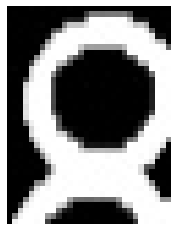

KNN: ['Q'] SVM: ['Q']


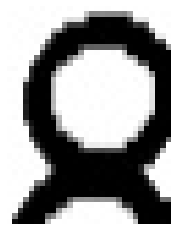

KNN: ['J'] SVM: ['J']


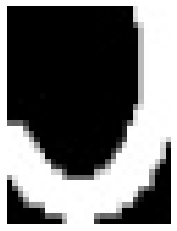

KNN: ['J'] SVM: ['J']


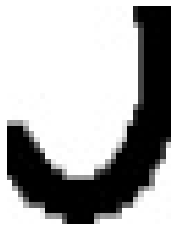

KNN: ['10'] SVM: ['10']


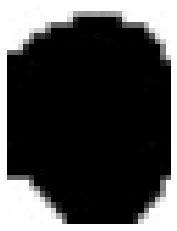

KNN: ['10'] SVM: ['10']


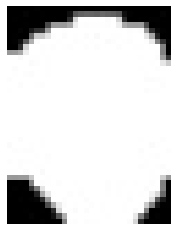

KNN: ['heart'] SVM: ['heart']


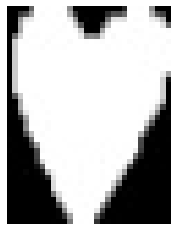

KNN: ['heart'] SVM: ['heart']


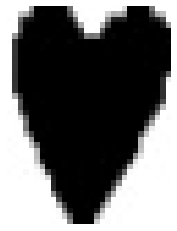

KNN: ['J'] SVM: ['J']


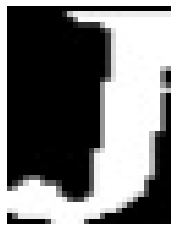

KNN: ['J'] SVM: ['J']


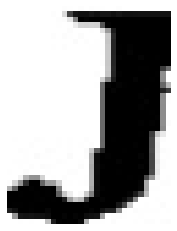

KNN: ['9'] SVM: ['2']


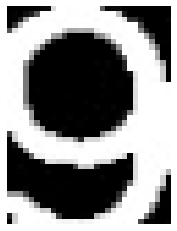

KNN: ['9'] SVM: ['2']


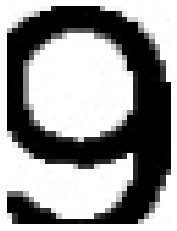

KNN: ['club'] SVM: ['diamond']


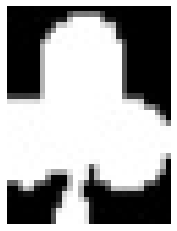

KNN: ['club'] SVM: ['diamond']


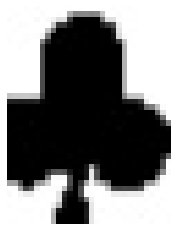

KNN: ['10'] SVM: ['10']


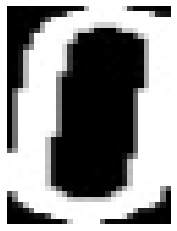

KNN: ['10'] SVM: ['10']


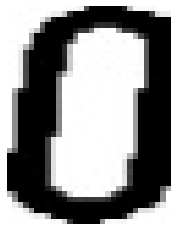

KNN: ['club'] SVM: ['heart']


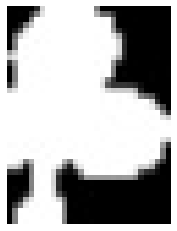

KNN: ['club'] SVM: ['heart']


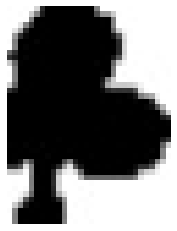

KNN: ['6'] SVM: ['3']


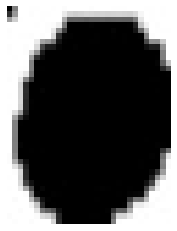

KNN: ['6'] SVM: ['3']


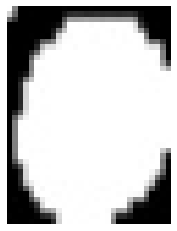

KNN: ['heart'] SVM: ['heart']


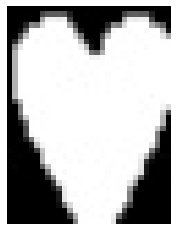

KNN: ['heart'] SVM: ['heart']


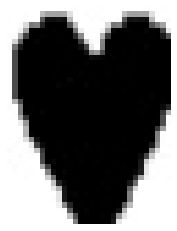

KNN: ['J'] SVM: ['3']


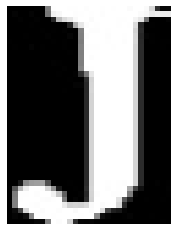

KNN: ['J'] SVM: ['3']


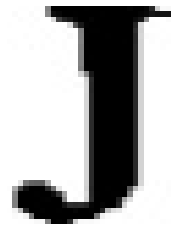

KNN: ['heart'] SVM: ['heart']


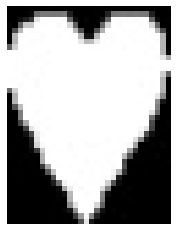

KNN: ['heart'] SVM: ['heart']


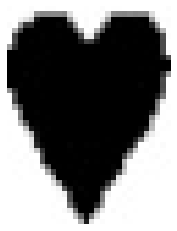

KNN: ['J'] SVM: ['J']


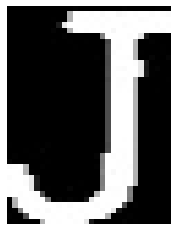

KNN: ['J'] SVM: ['J']


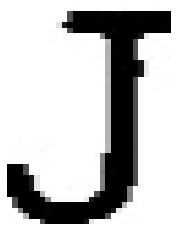

KNN: ['club'] SVM: ['club']


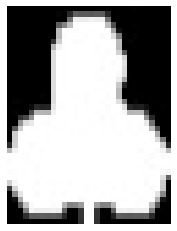

KNN: ['club'] SVM: ['club']


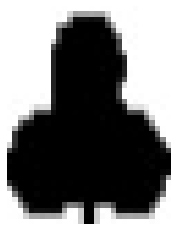

KNN: ['9'] SVM: ['9']


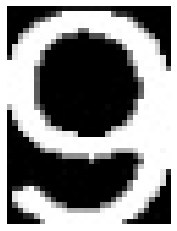

KNN: ['9'] SVM: ['9']


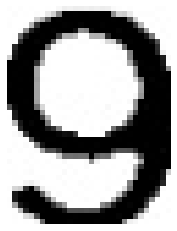

KNN: ['heart'] SVM: ['heart']


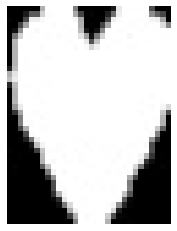

KNN: ['heart'] SVM: ['heart']


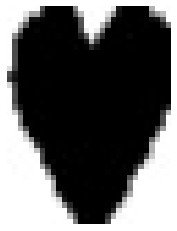

KNN: ['heart'] SVM: ['heart']


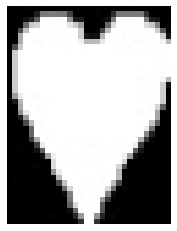

KNN: ['heart'] SVM: ['heart']


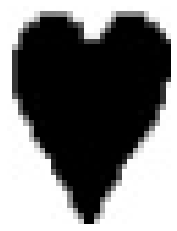

KNN: ['Q'] SVM: ['2']


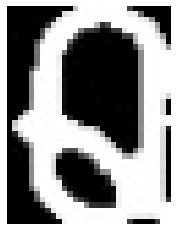

KNN: ['Q'] SVM: ['2']


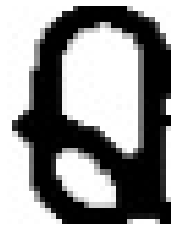

KNN: ['club'] SVM: ['spade']


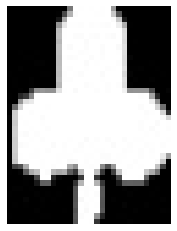

KNN: ['club'] SVM: ['spade']


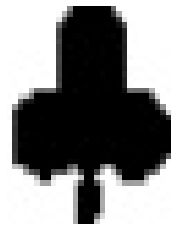

KNN: ['Q'] SVM: ['K']


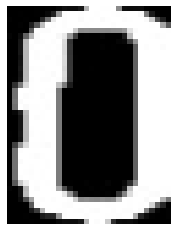

KNN: ['Q'] SVM: ['K']


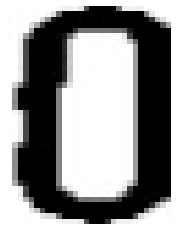

KNN: ['spade'] SVM: ['spade']


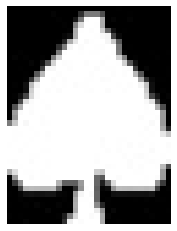

KNN: ['spade'] SVM: ['spade']


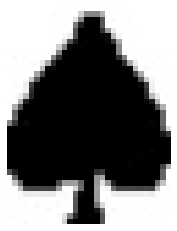

KNN: ['K'] SVM: ['heart']


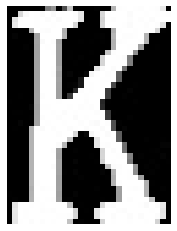

KNN: ['K'] SVM: ['heart']


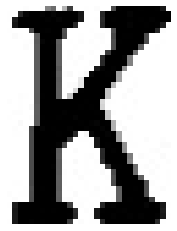

KNN: ['5'] SVM: ['5']


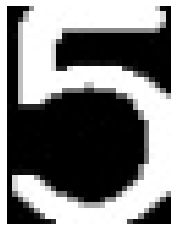

KNN: ['5'] SVM: ['5']


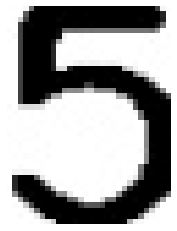

KNN: ['spade'] SVM: ['spade']


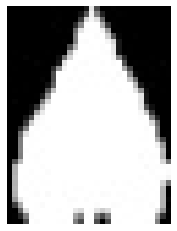

KNN: ['spade'] SVM: ['spade']


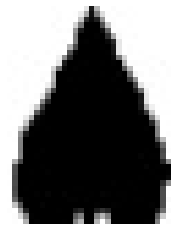

KNN: ['2'] SVM: ['5']


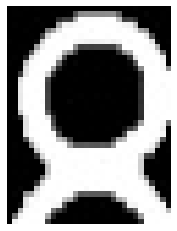

KNN: ['2'] SVM: ['5']


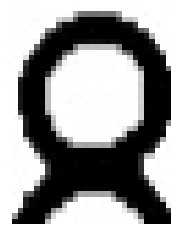

In [142]:
import os

dire="dataSet/testData/"
for filename in os.listdir(dire):
    image = cv2.imread(dire+filename, cv2.COLOR_BGR2GRAY)/255.0
    image.resize(40, 30)
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    showImage(image)
    imageInverted = 1-image 
    # print("SVM:", model_SVC.predict([imageInverted.flatten()]))
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    showImage(imageInverted)